In [141]:
from qlasskit import qlassf, Qint, Qfixed

@qlassf
def func_max(a: Qint[3]) -> Qint[5]:
    m = 0
    for i in range(4):
        m = max(((a + i) ** 2), m)
    return m

@qlassf
def func_min(a: Qint[3]) -> Qint[5]:
    m = 30
    for i in range(4):
        m = min(((a + i) ** 2 - 2 * (a + i) + 2), m)
    return m

@qlassf
def derivata(x: Qint[2]) -> Qint[3]:
    return (2 * (x+1) + 1 - (2 * (x-1) + 1))

@qlassf
def sum_two_numbers(a: Qint[2], b: Qint[2]) -> Qint[2]:
    return a + b

@qlassf
def mul_two_numbers(a: Qint[2], b: Qint[2]) -> Qint[3]:
    return a*b

@qlassf
def bool_op(a: bool, b: bool) -> bool:
    return (a or b)

Output: [9, 10, 8, 7, 11]


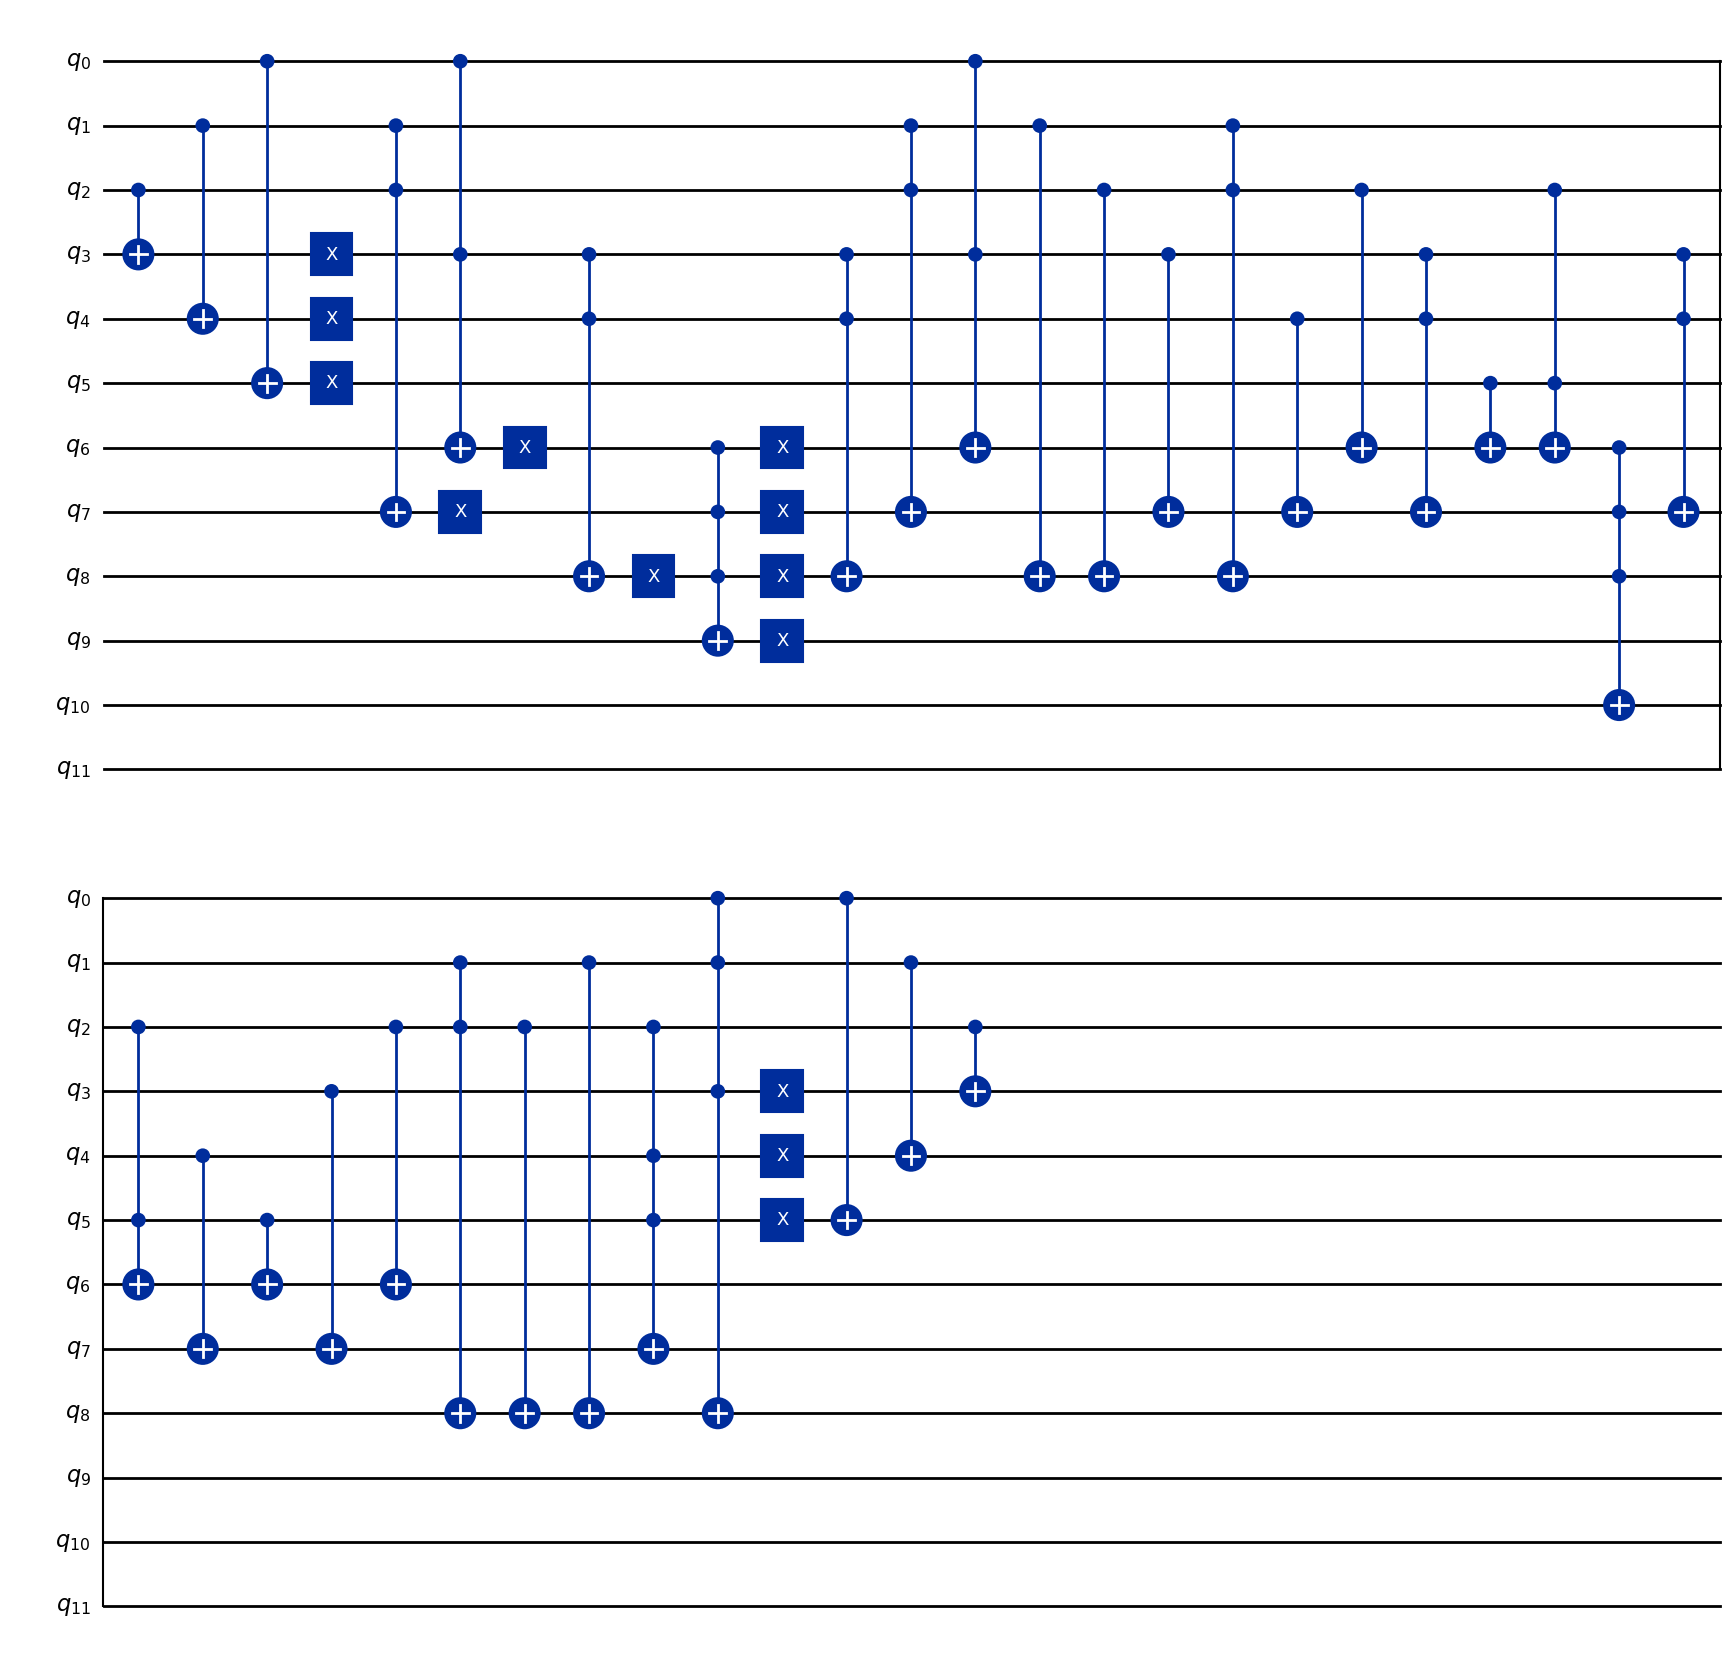

In [142]:
circuit = func_min.export("qiskit")
print("Output: " + str(func_min.output_qubits))
circuit.draw("mpl")

In [78]:
import cirq_google

processor_id = "rainbow"  # or "weber"
# Load the calibration data
cal = cirq_google.engine.load_median_device_calibration(processor_id)
# Turn calibration data into a noise properties object
noise_props = cirq_google.noise_properties_from_calibration(cal)
# Build a noise model from the noise properties
noise_model = cirq_google.NoiseModelFromGoogleNoiseProperties(noise_props)


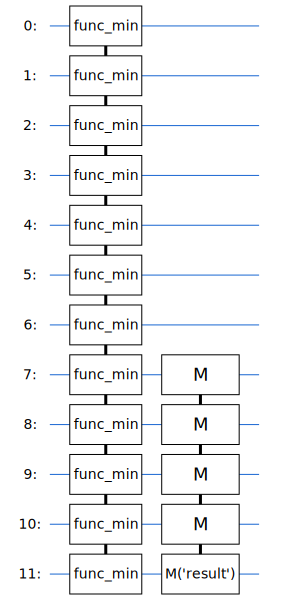

In [144]:
from cirq.contrib.svg import SVGCircuit
import cirq
circuit = cirq.Circuit()
#circuit.append(cirq.X(cirq.LineQubit(0)))
#circuit.append(cirq.X(cirq.LineQubit(3)))
circuit.append(func_min.export("cirq"))
#SVGCircuit(circuit)
#circuit = sum_two_numbers.export("cirq") [10, 11, 12, 13, 22, 18, 14, 19]
lista = func_min.output_qubits[::-1]
circuit.append(cirq.measure([cirq.LineQubit(i) for i in lista], key='result'))

# Add noise to the circuit.
noisy = circuit.with_noise(cirq.depolarize(p=0.05))

#noisy = circuit.with_noise(noise_model)

SVGCircuit(circuit)

Simulate the circuit:
1


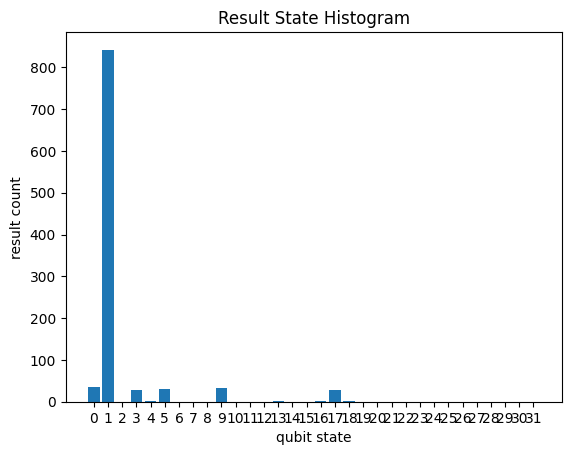

In [145]:
import qsimcirq
import matplotlib.pyplot as plt

qsim_simulator = qsimcirq.QSimSimulator()
print('Simulate the circuit:')
# Sample the circuit

samples = qsim_simulator.run(noisy, repetitions=1000)
print(samples.data['result'].mode()[0])
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()


Simulate the circuit:
1


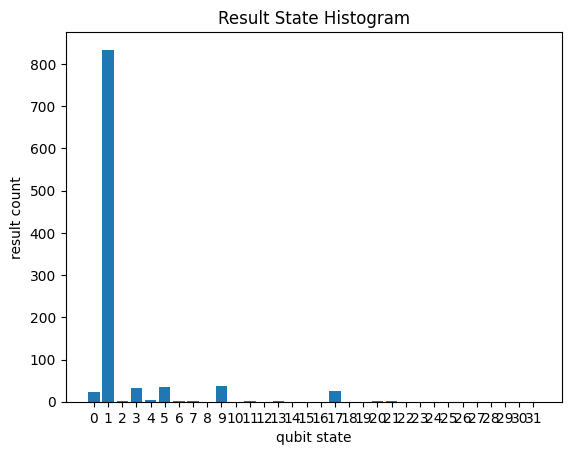

"for i, step in enumerate(s.simulate_moment_steps(circuit)):\n    print('state at step %d: %s' % (i, np.around(step.state_vector(copy=True), 3)))"

In [146]:
import matplotlib.pyplot as plt
import numpy as np

s = cirq.Simulator()
print('Simulate the circuit:')
# Sample the circuit

samples = s.run(noisy, repetitions=1000)
print(samples.data['result'].mode()[0])
cirq.plot_state_histogram(samples, plt.subplot())
plt.show()
'''for i, step in enumerate(s.simulate_moment_steps(circuit)):
    print('state at step %d: %s' % (i, np.around(step.state_vector(copy=True), 3)))'''
